In [190]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df_10 = pd.read_csv('data_2010.csv')
df_11 = pd.read_csv('data_2011.csv')

In [3]:
df_11.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [5]:
# There are some missing values in the CustomerId

In [6]:
df_10.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [7]:
# nagative value in price and Quantity

In [8]:
# Check the customer null data
df_10[df_10['Customer ID'].isnull()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [9]:
# Check the nagative values
df_10.query('Quantity<0')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [10]:
# There are some invoice start with c , which meant by Cancellation , Check any other value present in there
df_10['Invoice'].str.replace('[0-9]','',regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [11]:
# Now check what's with A in invoice
df_10[df_10['Invoice'].str.match('A\d+')].head()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_8612\1631001800.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_10[df_10['Invoice'].str.match('A\d+')].head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [12]:
# Since there is only instance and the cusomers are missing ,will Drop it

According to data StockCode is 5 digit number assingned to each unique product , but as we analysed throug we can find there are some number that show otherwise

In [13]:
# Check the Stock code , filter all the observation that is not 5 digit number
df_10[~df_10.StockCode.str.match('^\d{5}[A-Za-z]?$')]['StockCode'].unique()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_8612\347670631.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_10[~df_10.StockCode.str.match('^\d{5}[A-Za-z]?$')]['StockCode'].unique()


array(['POST', '79323LP', '15056BL', 'D', '79323GR', 'DCGS0058',
       'DCGS0068', 'DOT', '15056bl', 'M', 'DCGS0004', 'DCGS0076', 'C2',
       'BANK CHARGES', 'DCGS0003', 'TEST001', 'gift_0001_80', 'DCGS0072',
       'gift_0001_20', 'DCGS0044', 'TEST002', 'gift_0001_10',
       'gift_0001_50', 'DCGS0066N', 'gift_0001_30', 'PADS', '72024HC',
       'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [14]:
# Cleaning 
cleaned_df = df_10.copy()

In [15]:
mask = cleaned_df['Invoice'].str.match('^\d+$')
cleaned_df = cleaned_df[mask]

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_8612\3746873164.py:1: SyntaxWarning: invalid escape sequence '\d'
  mask = cleaned_df['Invoice'].str.match('^\d+$')


In [16]:
mask = (df_10['StockCode'].str.match('^\\d+$')|
       df_10['StockCode'].str.match('^\\d+[A-Za-z]+$')|
       df_10['StockCode'].str.match('^PADS$'))
cleaned_df= cleaned_df[mask]

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_8612\2066370062.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df= cleaned_df[mask]


In [17]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,512796.000000,512796.000000,406337.000000
mean,11.001279,3.391447,15373.632992
std,104.352433,5.067864,1677.365907
min,-9600.000000,0.000000,12346.000000
25%,1.000000,1.250000,14004.000000
50%,3.000000,2.100000,15326.000000
75%,10.000000,4.210000,16814.000000
max,19152.000000,1157.150000,18287.000000


In [18]:
# There is still some nagative valuein the quantity 
# we will drop the null customer rows

In [19]:
cleaned_df.isna().sum()

Invoice             0
StockCode           0
Description      2880
Quantity            0
InvoiceDate         0
Price               0
Customer ID    106459
Country             0
dtype: int64

In [20]:
cleaned_df.dropna(subset=['Customer ID'],inplace=True)

In [21]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,406337.000000,406337.000000,406337.000000
mean,13.619099,2.991462,15373.632992
std,97.000659,4.285876,1677.365907
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14004.000000
50%,5.000000,1.950000,15326.000000
75%,12.000000,3.750000,16814.000000
max,19152.000000,295.000000,18287.000000


In [22]:
# hm ok , the nagative values are gone now

In [23]:
# Check which are the data where price == 0
mask = cleaned_df['Price'] == 0
cleaned_df[mask]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.0,15070.0,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.0,18071.0,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.0,14258.0,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.0,12417.0,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.0,16858.0,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.0,13047.0,United Kingdom


Since the observation with 0 price is too low, dropping it



In [24]:
cleaned_df = cleaned_df[~(cleaned_df['Price']==0)]

In [25]:
cleaned_df.Price.min()

0.001

HMM that's a small number

In [26]:
# let's check how many percentage of total data we removed or cleaned
((1 - (len(cleaned_df)/len(df_10)))*100)

22.675707616740347

Ok we lost about 22% percentage of our data

In [27]:
# create new column for total sale
cleaned_df['TotalLineSale'] = cleaned_df['Quantity'] * cleaned_df['Price']

In [28]:
agg_df = cleaned_df.groupby('Customer ID',as_index=False)

In [29]:
customer_rfm = agg_df.agg(
    Frequency = ('Invoice','nunique'),
    Monetory_value = ('TotalLineSale','sum'),
    LastInvoiceDate = ('InvoiceDate','max')
)

In [30]:
customer_rfm.head()

,Customer ID,Frequency,Monetory_value,LastInvoiceDate
0,12346.0,2,169.36,2010-06-28 13:53:00
1,12347.0,2,1323.32,2010-12-07 14:57:00
2,12348.0,1,221.16,2010-09-27 14:59:00
3,12349.0,2,2221.14,2010-10-28 08:23:00
4,12351.0,1,300.93,2010-11-29 15:23:00


In [31]:
customer_rfm['LastInvoiceDate'] = pd.to_datetime(customer_rfm.LastInvoiceDate)

In [32]:
last_invoice_date =  customer_rfm.LastInvoiceDate.max()

In [33]:
customer_rfm['recentcy'] = (last_invoice_date - customer_rfm['LastInvoiceDate'])

In [34]:
customer_rfm['recentcy'] = customer_rfm.recentcy.dt.days

In [35]:
customer_rfm

,Customer ID,Frequency,Monetory_value,LastInvoiceDate,recentcy
0,12346.0,2,169.36,2010-06-28 13:53:00,164
1,12347.0,2,1323.32,2010-12-07 14:57:00,2
2,12348.0,1,221.16,2010-09-27 14:59:00,73
3,12349.0,2,2221.14,2010-10-28 08:23:00,42
4,12351.0,1,300.93,2010-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.0,6,641.77,2010-11-22 15:30:00,17
4281,18284.0,1,411.68,2010-10-04 11:33:00,66
4282,18285.0,1,377.00,2010-02-17 10:24:00,295
4283,18286.0,2,1246.43,2010-08-20 11:57:00,111


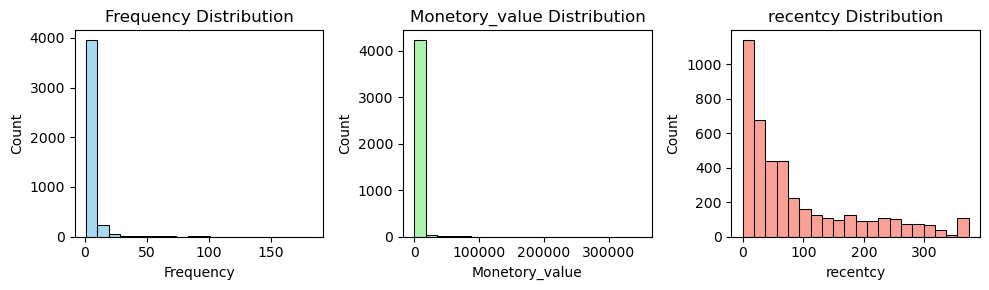

In [36]:
fig, ax = plt.subplots(1,3,figsize=(10,3))
color = ['skyblue','lightgreen','salmon']
for  i,column in enumerate(['Frequency','Monetory_value','recentcy']):
    sns.histplot(x=customer_rfm[column],ax=ax[i],bins=20,color=color[i])
    ax[i].set_title(column+' Distribution')
plt.tight_layout()

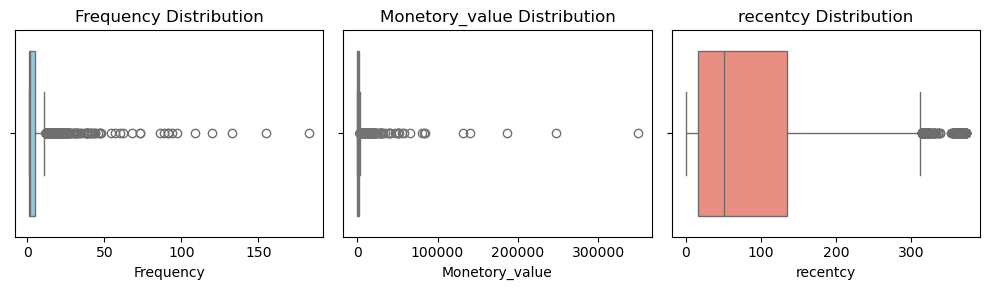

In [37]:
fig, ax = plt.subplots(1,3,figsize=(10,3))
color = ['skyblue','lightgreen','salmon']
for  i,column in enumerate(['Frequency','Monetory_value','recentcy']):
    sns.boxplot(x=customer_rfm[column],ax=ax[i],color=color[i])
    ax[i].set_title(column+' Distribution')
plt.tight_layout()

Hmm there are many outlier, This will be bad for our clustering algorithm,Since we can't drop them on the basis of model percpective there are our important extreme customer who we should take more care ,so iam going to separete these extreme customer for another analysis

In [38]:
# Function that saparete outliers in the box plot
def box_outliers(column_name):
    percentile_25 = customer_rfm[column_name].quantile(.25)
    percentile_75 = customer_rfm[column_name].quantile(.75)
    inter_quartile =  percentile_75 - percentile_25

    upper_limit = percentile_75 + (inter_quartile*1.5)
    lower_limit = percentile_25 - (inter_quartile*1.5)

    return  customer_rfm[customer_rfm[column_name]>upper_limit]

In [39]:
monetory_outliers_df = box_outliers('Monetory_value')
recentcy_outliers_df = box_outliers('recentcy')
frequency_outliers_df = box_outliers('Frequency')

In [40]:
monetory_outliers_df.describe()

,Customer ID,Frequency,Monetory_value,LastInvoiceDate,recentcy
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,17.167849,12188.101740,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,1.000000,3802.040000,2009-12-10 18:03:00,0.000000
25%,13622.000000,8.000000,4605.940000,2010-11-08 13:17:30,3.000000
50%,14961.000000,12.000000,6191.320000,2010-11-26 12:19:00,13.000000
75%,16692.000000,18.000000,10273.235000,2010-12-06 10:34:30,31.000000
max,18260.000000,183.000000,349164.350000,2010-12-09 19:32:00,364.000000
std,1728.661406,19.729755,25830.851045,NaN,51.541004


In [41]:
frequency_outliers_df.describe()

,Customer ID,Frequency,Monetory_value,LastInvoiceDate,recentcy
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,23.810036,14409.714932,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,12.000000,1094.390000,2010-05-12 16:51:00,0.000000
25%,13800.000000,13.000000,4331.560500,2010-11-20 13:14:30,2.000000
50%,15465.000000,17.000000,6615.770000,2010-12-02 10:46:00,7.000000
75%,16828.500000,23.000000,11692.405000,2010-12-07 11:08:30,19.000000
max,18260.000000,183.000000,349164.350000,2010-12-09 19:32:00,211.000000
std,1748.429987,21.932937,31381.736785,NaN,26.589117


In [42]:
recentcy_outliers_df.head()

,Customer ID,Frequency,Monetory_value,LastInvoiceDate,recentcy
66,12439.0,2,1158.18,2010-01-26 12:11:00,317
69,12443.0,1,365.31,2009-12-07 15:42:00,367
83,12470.0,1,211.95,2010-01-19 11:01:00,324
97,12487.0,1,285.30,2009-12-09 11:36:00,365
121,12531.0,1,1645.98,2010-01-22 14:17:00,321


In [84]:
non_outliers_df = customer_rfm[~ (customer_rfm.index.isin(frequency_outliers_df.index) | customer_rfm.index.isin(monetory_outliers_df.index) | customer_rfm.index.isin(recentcy_outliers_df.index))]

In [85]:
# now anlayse the non outlier data
non_outliers_df.describe()

,Customer ID,Frequency,Monetory_value,LastInvoiceDate,recentcy
count,3645.000000,3645.000000,3645.000000,3645,3645.000000
mean,15373.847462,2.938820,911.702608,2010-09-14 21:43:02.716049408,85.647462
min,12346.000000,1.000000,1.550000,2010-01-31 12:19:00,0.000000
25%,13900.000000,1.000000,295.050000,2010-08-02 12:42:00,21.000000
50%,15387.000000,2.000000,615.200000,2010-10-15 12:30:00,55.000000
75%,16854.000000,4.000000,1307.400000,2010-11-18 12:11:00,129.000000
max,18287.000000,11.000000,3788.210000,2010-12-09 20:01:00,312.000000
std,1695.682370,2.261291,824.092565,NaN,83.682362


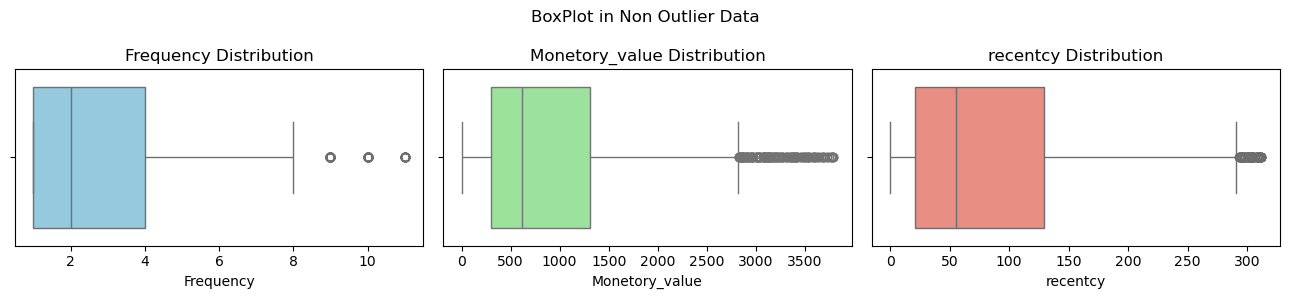

In [89]:
# Now check the boxplot once more
fig, ax = plt.subplots(1,3,figsize=(13,3))
color = ['skyblue','lightgreen','salmon']
for  i,column in enumerate(['Frequency','Monetory_value','recentcy']):
    sns.boxplot(x=non_outliers_df[column],ax=ax[i],color=color[i])
    ax[i].set_title(column+' Distribution')
fig.suptitle('BoxPlot in Non Outlier Data')
plt.tight_layout()

Text(0.5, 0, 'nothi')

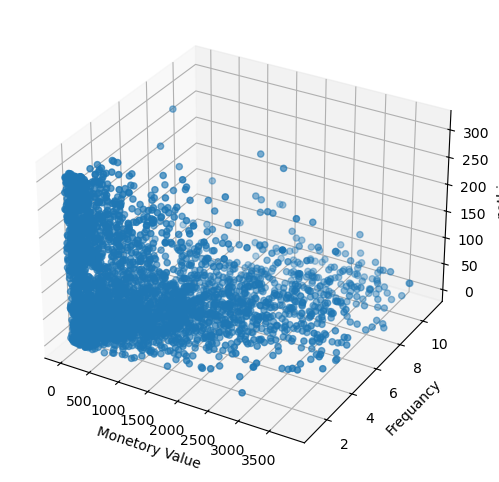

In [99]:
# using matplolib
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection="3d")
ax.scatter(non_outliers_df['Monetory_value'],non_outliers_df['Frequency'],non_outliers_df['recentcy'])
plt.xlabel('Monetory Value')
plt.ylabel('Frequancy')
ax.set_zlabel('nothi')

In [103]:
# Scale the data usig standard scaling for clusteting (Kmeans is very sensitive with the scale of the data)
st = StandardScaler().set_output(transform='pandas')
scaled_data = st.fit_transform(non_outliers_df[['Monetory_value','Frequency','recentcy']])

In [107]:
scaled_data = scaled_data.set_index(non_outliers_df.index)

In [249]:
# Plot a intractive plot with plotly

fig = px.scatter_3d(scaled_data, x='Monetory_value', y='Frequency', z='recentcy',width=900, height=600)
fig.show()

In [110]:
# Elbow method to find best number of cluster
max_k = 10
inertia = []
for k in range(2,max_k+1):
    kmean = KMeans(k,max_iter=1000,random_state=42)
    kmean.fit(X=scaled_data)
    inertia.append(kmean.inertia_)


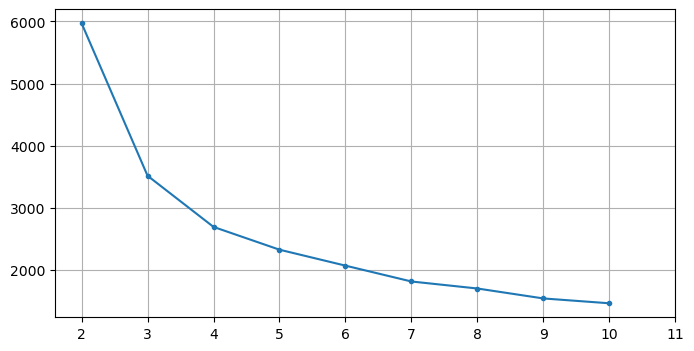

In [189]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
ax.plot(inertia,marker='.')
plt.xticks(ticks=ax.get_xticks()[1:],labels=range(2,len(ax.get_xticks())+1))
plt.grid(True )
plt.show()

In [208]:
# Elbow method to find best number of cluster
max_k = 10
silhouette_score_list = []
for k in range(2,max_k+1):
    kmean = KMeans(k,max_iter=1000,random_state=42)
    cluster_labels = kmean.fit_predict(X=scaled_data)
    silhouette_score_list.append(silhouette_score(scaled_data,cluster_labels))


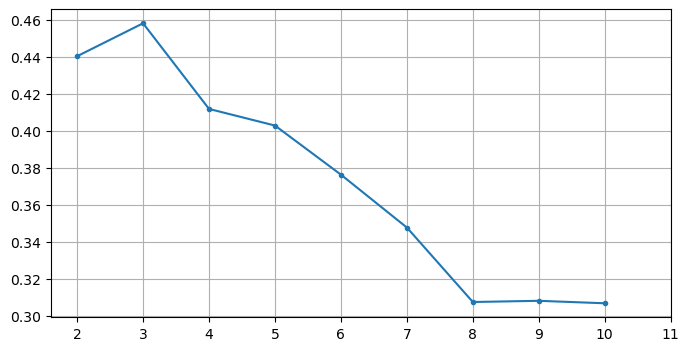

In [209]:
# Checking the silhoute score to find 4 or 5 is better 
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
ax.plot(silhouette_score_list,marker='.')
plt.xticks(ticks=ax.get_xticks()[1:],labels=range(2,len(ax.get_xticks())+1))
plt.grid(True )
plt.show()

In [ ]:
# 4 fixed

In [234]:
km = KMeans(4,random_state=42,max_iter=1000)
cluster_labels = km.fit_predict(scaled_data)

In [235]:
len(cluster_labels)

3645

In [236]:
non_outliers_df['cluster'] = cluster_labels

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_8612\141889176.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [237]:
non_outliers_df.head(3)

,Customer ID,Frequency,Monetory_value,LastInvoiceDate,recentcy,cluster
0,12346.0,2,169.36,2010-06-28 13:53:00,164,1
1,12347.0,2,1323.32,2010-12-07 14:57:00,2,3
2,12348.0,1,221.16,2010-09-27 14:59:00,73,2


Text(0.5, 0, 'nothi')

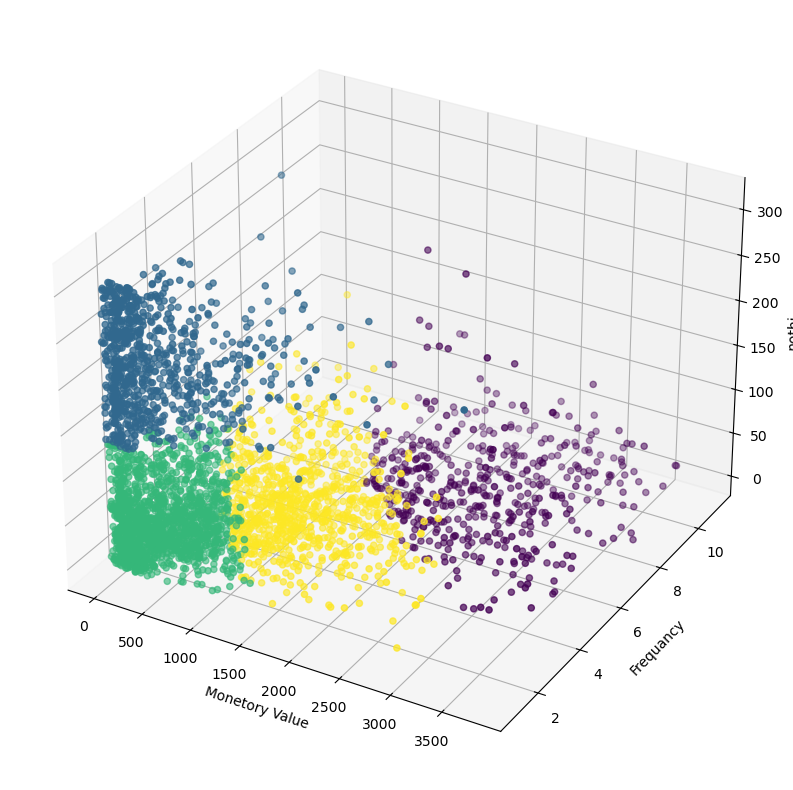

In [244]:
# using matplolib
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
ax.scatter(non_outliers_df['Monetory_value'],non_outliers_df['Frequency'],non_outliers_df['recentcy'],c=non_outliers_df['cluster'])
plt.xlabel('Monetory Value')
plt.ylabel('Frequancy')
ax.set_zlabel('nothi')

In [251]:
fig = px.scatter_3d(non_outliers_df, x='Monetory_value', y='Frequency', z='recentcy',
              color='cluster', width=900, height=700)
fig.show()

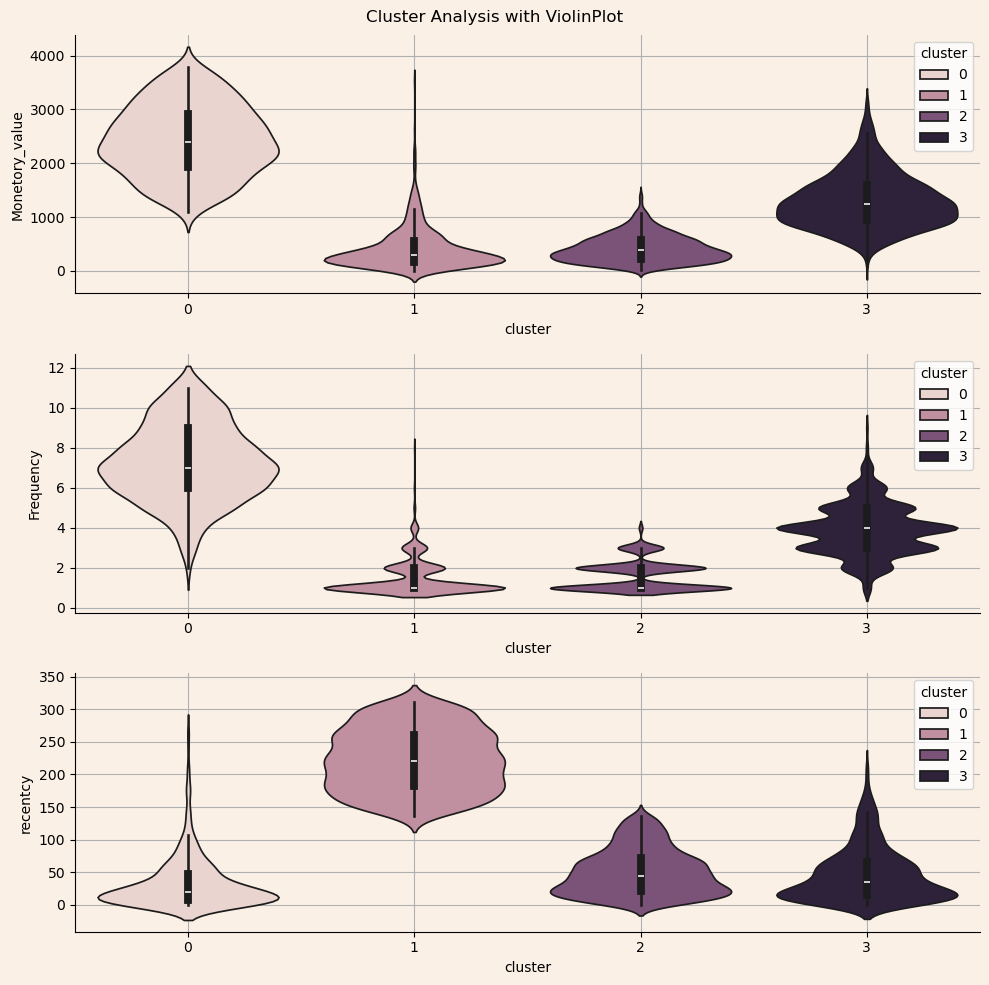

In [276]:
# Cluster Analysis using violin plot
fig, ax = plt.subplots(3,1,figsize=(10,10),facecolor='linen')
ax = ax.flatten()
columns = ['Monetory_value','Frequency','recentcy']

for i in range(0,3):
    sns.violinplot(x=non_outliers_df['cluster'],y=non_outliers_df[columns[i]],ax=ax[i],hue=non_outliers_df['cluster'])
    ax[i].set_facecolor('linen')
    ax[i].spines[['top','right']].set_visible(False)
    ax[i].grid(True)
    ax[i].set_axisbelow(True)
fig.suptitle('Cluster Analysis with ViolinPlot')
plt.tight_layout()

Cluster 0:
Monetary Value: This cluster has a wide range of monetary values with customers generally spending more than other clusters.
Interpretation: These customers have decent spending power.
Frequency: Customers here also purchase frequently, indicating they are regular buyers.
Interpretation: These customers are loyal and engage with your business regularly.
Recency: These customers have made purchases quite recently.
Interpretation: They are active customers and have shown engagement recently.
Customer Type: High-Value, Frequent, and Recently Active Customers
Action: Focus on retaining these customers with personalized offers, loyalty programs, and regular engagement through follow-up communications. They are critical to your revenue stream, so nurturing this group is essential.

Cluster 1:
Monetary Value: Customers in this cluster have relatively low spending.
Interpretation: These customers don’t contribute significantly in terms of spending.
Frequency: They make very infrequent purchases.
Interpretation: These customers don’t engage with your business often.
Recency: Purchases from this group haven’t occurred recently.
Interpretation: They are considered lapsed customers.
Customer Type: Low-Value, Infrequent, and Lapsed Customers
Action: Consider re-engagement campaigns to revive their interest, such as sending special offers or discounts. If they don't respond to these efforts, you could reduce marketing focus on this group to save resources.

Cluster 2:
Monetary Value: These customers fall in the moderate spending range.
Interpretation: They contribute to your revenue, but not as much as top spenders.
Frequency: Purchases occur infrequently, but not as rare as in Cluster 1.
Interpretation: These customers engage with your business occasionally, but not regularly.
Recency: The recency of their purchases is moderate.
Interpretation: These customers are neither highly engaged nor completely lapsed.
Customer Type: Moderate-Value, Low Frequency, and Moderately Recent Customers
Action: A mild engagement strategy would work for this group. Incentivize them with offers to increase their frequency of purchases and push them towards higher engagement. They have the potential to become more valuable customers if nurtured properly.

Cluster 3:
Monetary Value: This group has the highest spending compared to the other clusters.
Interpretation: These are your top spenders.
Frequency: Customers in this cluster also purchase relatively often.
Interpretation: They are loyal customers with frequent interactions.
Recency: Their purchases have occurred relatively recently.
Interpretation: These are active customers.
Customer Type: Top-Value, Frequent Buyers, and Active Customers
Action: These are your VIP customers. Focus heavily on retention strategies here. Offer personalized services, exclusive products, and VIP-level rewards to maintain their loyalty and ensure they continue to spend at a high level.

Summary of Actions:
Cluster 0: Retain through personalized offers, loyalty programs.
Cluster 1: Attempt re-engagement, but reduce focus if no response.
Cluster 2: Mild engagement to increase frequency and spending.
Cluster 3: VIP treatment with high-priority retention efforts.